$$\author{T.N.Olsthoorn}$$


# What is the risk for differential subsidence as a function of the distance between points?

Not subsidence is important, but differences in subsidence within the foundation of buildings. So let's see if we can estimate whether such difference are likely, given a large number of points for which the subsidence was estimated individually based on local soil presure and fricture sounding.

Calculations:
+ compute the distance between all paired points (504 x 504 pairs given 504 points)
+ turn it into a soted list and divide the pairs across bins with preset distances.
+ compute for each such set of points the standard deviation of their subsidence difference.
+ makea graph to show standard deviation versus distance between points.
+ estimate from the graph what the expected subsidence differnce will be for zero distance, so that a goed idea is formed abouth the subsidence damage that is to be expected to buildings.

## Read the data

See the files below

In [3]:
!ls

SC001_KaleIngreep_MaaiveldzettingOpSondeerlocaties_v001.csv
Wilhelminakanaal_zettingen.ipynb
Wilhelminakanaal_zettingen.pdf


In [4]:
# Import the necessary functionality
import csv
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# Read the file, and turn it into a numpy array of three columns [final_subsidence, x, y]
with open('SC001_KaleIngreep_MaaiveldzettingOpSondeerlocaties_v001.csv') as csvfile:
    rdr = csv.reader(csvfile, delimiter=',', quotechar='"')
    data = np.zeros((10000,3))
    for ir, row in enumerate(rdr):
        if ir>0:
            data[ir,:] = np.array([float(row[1]), float(row[2]), float(row[3])])
    
    # keep only the rows that contain data
    dat=data[1:ir+1]

In [6]:
Np = dat.shape[0] # number of points in file
ip = np.arange(Np, dtype=int) # point numbers, to use later inplots
d = dat[:,0]  # final subsidence
x = dat[:,1]  # x-coord
y = dat[:,2]  # y-coord

# combine, so column becomes an array (Np, Np) of point combinations
Ip1 = ip[np.newaxis,:] - np.zeros((Np, 1), dtype=int)  # point numbers of all columns
Ip2 = ip[:,np.newaxis] - np.zeros((1, Np), dtype=int)  # point numbers of all rows
Dx = x[np.newaxis, :] - x[:,np.newaxis]  # x[i] - y[j] for all pairs
Dy = y[np.newaxis, :] - y[:,np.newaxis]  # y[i] - y[j] for all pairs
R = np.sqrt( Dx**2 + Dy**2)      # distance between all pairde points
D = (d[np.newaxis,:] - d[:,np.newaxis]) # The subsidence difference between all point pairs

# set all R below the diagional of the array to -1 to easily remove them later, because they're double: R[i,j]=R[j,i]
for i in range(R.shape[0]):
    R[i, np.arange(i)]=-1   

+ turn arrays into lists
+ sort by distance
+ remember the point numbers to allow plotting later on
+ limit the distances to reasonable max value of say 1500 m
+ choose an incrementing series of distances to make pair-bundles
+ compute std deviation for the subsidence differences for each bundle
+ plot the std of the subsidence difference versus distance between point pairs

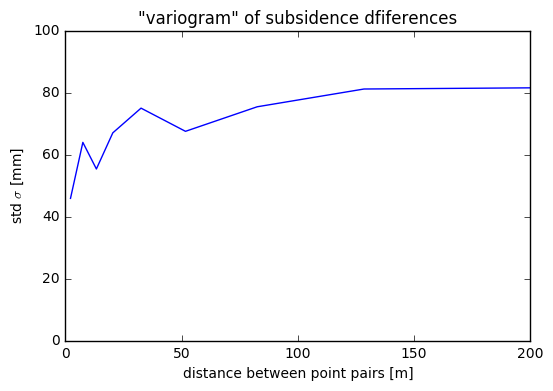

In [7]:
# Sort the pairs by distance
I = np.argsort(R.ravel())  # Make lists and get indices of sorted pairs
r = R.ravel()[I]           # List of sorted distances
d = D.ravel()[I]           # List of subsidence differences
ip1 = Ip1.ravel()[I]      # list of first point of point pairs
ip2 = Ip2.ravel()[I]      # list of second point of point pairs

# Only select relevant distances, say < 1500 m
J = np.logical_and(r>0, r<1500)
iip1 = ip1[J] # point 1 of point pair
iip2 = ip2[J] # point 2 of point pair
dd   = d[  J] # only take relevant distances
rr   = r[  J] # same

# Choose a series of incremental distances to allow bundling point pairs
h = np.hstack((0, 5, np.logspace(1, 3, 11)))    # choose between the distances
hm = 0.5 * (h[:-1] + h[1:])  # average of distances for each bundle

# Compute standard deviations of subsidence difference of each bundle per distance
sb = np.zeros(len(h)-1,)  # initialise all std at zero
hb = np.zeros(len(h)-1,)  # same
I1 = list()
I2 = list()
for ib in range(len(hm)):  # loop over all bungles
    J = np.logical_and(rr>=h[ib], rr<h[ib+1]) # indices ponts in bundle i
    sb[ib] = np.std(dd[J]) # std of bundle
    hb[ib] = np.mean(rr[J]) # avrate distance of point pairs in bundle
    I1.append(iip1[J]) # remember first point of point pairs in bundle
    I2.append(iip2[J]) # remember second pont of ponit pairs in bundle

# Present the results
ax = plt.figure().add_subplot(111)
ax.set(xlabel='distance between point pairs [m]', ylabel=r'std $\sigma$ [mm]', xlim=(0, 200),
       ylim=(0, 100), title='"variogram" of subsidence dfiferences')
ax.plot(hb, sb) # plot results
plt.show() # show plot

+ verify the result for the first puntenparen of the list

In [8]:
N = 50  # e.d. for the first 50 point pairs
np.vstack((rr[:N], dd[:N])).T

array([[   1.        ,   67.        ],
       [   1.        ,    0.        ],
       [   1.        , -119.        ],
       [   1.        ,   -1.        ],
       [   1.        ,    0.        ],
       [   1.        ,    0.        ],
       [   1.41421356,    1.        ],
       [   1.41421356,    0.        ],
       [   1.41421356,  113.        ],
       [   2.23606798,    0.        ],
       [   3.16227766,    1.        ],
       [   4.12310563,   -1.        ],
       [   4.12310563,   -1.        ],
       [   4.47213595,    0.        ],
       [   4.47213595,   24.        ],
       [   5.        ,  -42.        ],
       [   5.09901951,  -10.        ],
       [   5.65685425,   -1.        ],
       [   6.32455532,  -61.        ],
       [   6.40312424,  -76.        ],
       [   6.70820393,  -14.        ],
       [   7.21110255,   79.        ],
       [   8.48528137,    0.        ],
       [   8.94427191,    0.        ],
       [   8.94427191, -205.        ],
       [   9.05538514,   

## Result

The result if verified below by plotting point pairs by bundle and placing the std in the figure title.

The color gives the subsidence difference per individual point pair, where:
+ red = 0-10 mm
+ blue = 10-20 mm
+ green = 20-30 mm
+ black = 30-40 mm
+ purple = 40-50 mm
+ cyan = 60-70 mm
+ yellow = 70-80 mm

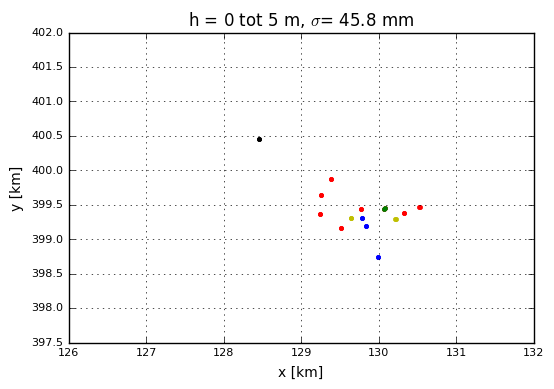

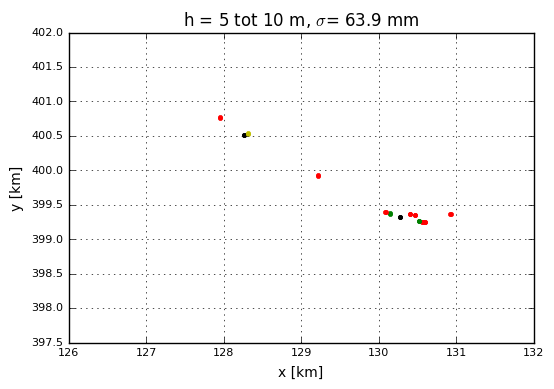

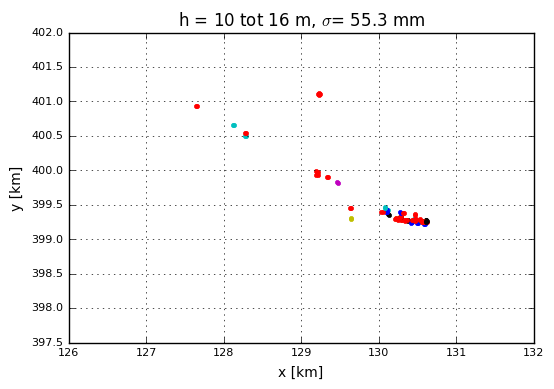

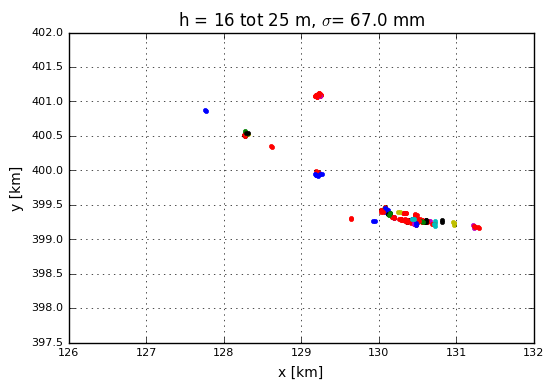

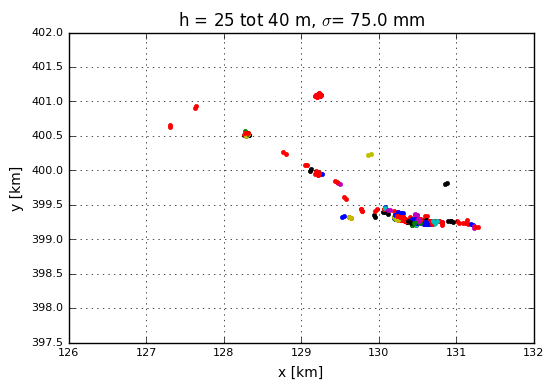

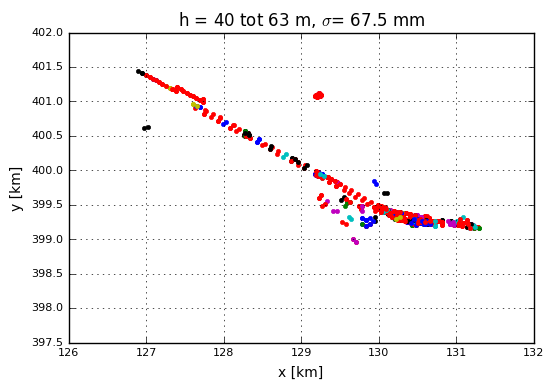

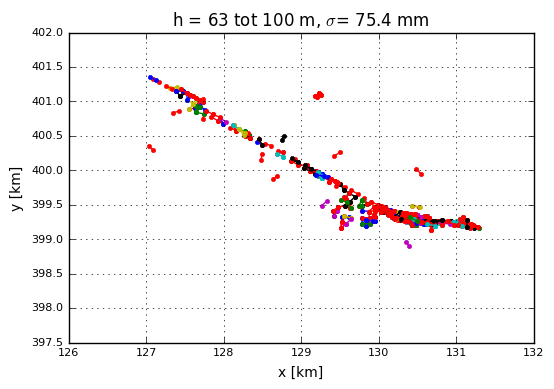

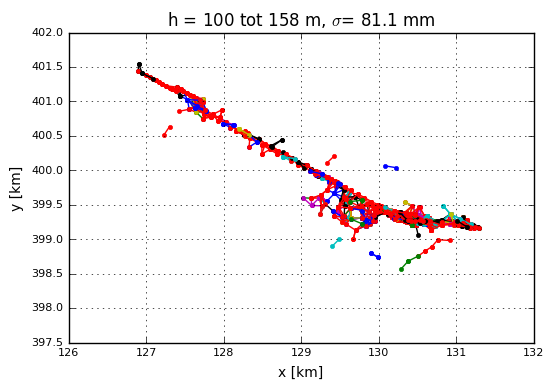

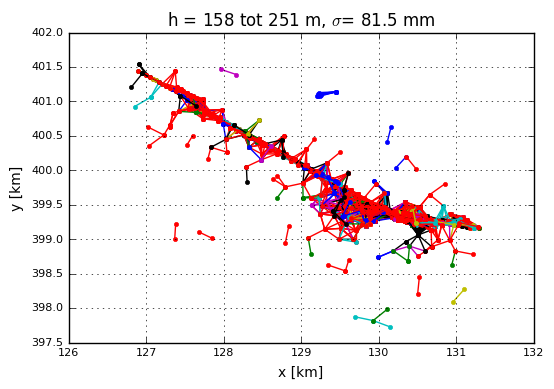

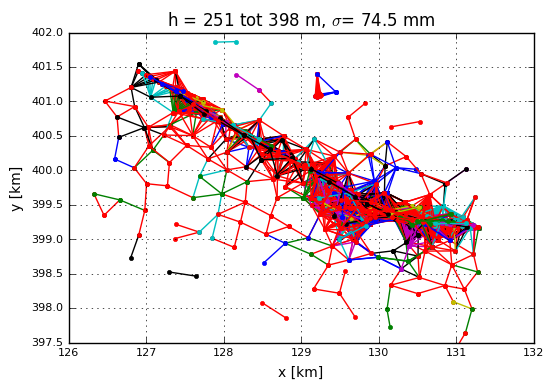

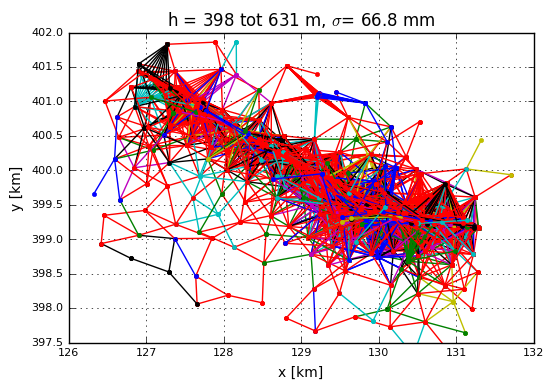

In [ ]:
# Verify by plotting the points of the same bundle
clrs = 'rbgkmcy'  # colors
Nc = len(clrs)  # number of colors before they will be repeated

ax = list()  # list of figures
for ib in range(len(sb)):
    ax.append(plt.figure().add_subplot(111)) # new figuur
    ax[-1].set(xlim=(126, 132), ylim=(397.5, 402), xlabel='x [km]', ylabel='y [km]')
    plt.setp(ax[-1].get_xticklabels(), fontsize=8)
    plt.setp(ax[-1].get_yticklabels(), fontsize=8)
    ax[-1].set_title(r'h = {:.0f} tot {:.0f} m, $\sigma$= {:.1f} mm'.format(h[ib], h[ib+1], sb[ib]))
    ax[-1].grid(True)
    
    for j, k in zip(I1[ib], I2[ib]): 
        ax[-1].plot(x[[j, k]]/1000., y[[j, k]]/1000., '.-', color=clrs[int(abs(dd[j])/10) % Nc])
plt.show()

## Conclusion

Based on the data (the graph) one can't say that the risk of subsidence difference is substantially reduced at the scale of a building, for the differences are not much reduced for very close points. .